In [1]:
###   Importação de bibliotecas   ###

In [2]:
import TCC_supercon_dados as tsd
import TCC_supercon_funcoes_apoio_ML as tsf
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
### Divisão dos dados que serão usados em um processão de validação cruzada para obtenção de melhores parâmetros  ###

In [4]:
X_treino, X_teste, Y_treino, Y_teste = tsf.divisao_dados_treinamento(0.2,tsd.X_modelagem,tsd.Y_modelagem)

In [5]:
###   Treina o modelo com os melhores prâmetros   ###


tree_reg = DecisionTreeRegressor(criterion='mse', max_depth=67, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=6,
                      min_samples_split=13, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')
tree_reg.fit(X_treino,Y_treino)

DecisionTreeRegressor(criterion='mse', max_depth=67, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=6,
                      min_samples_split=13, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [6]:
###   Imprime o resultado dos dados treinados   ###

print('\n R^2: \n', tree_reg.score(X_treino,Y_treino), '\n RMSE : \n',np.sqrt(mean_squared_error(tree_reg.predict(X_treino),Y_treino)))


 R^2: 
 0.9563715381994695 
 RMSE : 
 7.145280230692903


In [7]:
###   Imprime o resultado sobre dados nunca treinados   ###

print('\n R^2: \n', tree_reg.score(X_teste,Y_teste), '\n RMSE : \n',np.sqrt(mean_squared_error(tree_reg.predict(X_teste),Y_teste)))


 R^2: 
 0.8953768193834065 
 RMSE : 
 11.03680445899338


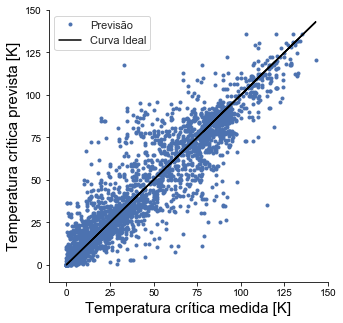

In [8]:
###   Visualização dos resultados de treinamento sobre dados nunca treinados pelo modelo   ###

print_x = Y_teste
print_y = tree_reg.predict(X_teste)

f, ax = plt.subplots(figsize=(5, 5))
# plt.title('Tc prevista pelo modelo vs. Tc medida em laboratório')
sns.set(style="ticks")
sns.despine()

plt.plot(print_x,print_y, 'b.',label = 'Previsão')
plt.plot(print_x,print_x, '-', label = 'Curva Ideal', color = 'black')

plt.xlabel('Temperatura crítica medida [K]',fontsize = 15)
plt.ylabel('Temperatura crítica prevista [K]',fontsize = 15)
plt.legend('Previsão')
plt.legend()
plt.xticks(np.linspace(0, 150, 7, endpoint=True))
plt.yticks(np.linspace(0, 150, 7, endpoint=True))
plt.axis([-10,150,-10,150])

plt.show()

In [9]:
###   Análise por faixa de temperatura   ###

In [11]:
#Dados das previsões e do bando de dados NIMS

dados_agrupamento=pd.DataFrame({'Y_teste':Y_teste ,'Y_previsto':tree_reg.predict(X_teste)})


# condições para avaliar as faixas de temperatura

def agrupar(x):

  if x['Y_teste']<=25.67:

    return 1

  elif  x['Y_teste']<=51.33:

    return 2

  elif x['Y_teste']<= 77:

    return 3

  elif x['Y_teste'] <= 113.5:

    return 4
  
  elif x['Y_teste']<=150:

    return 5

In [12]:
# Apresenta a segmentação aos dados

dados_agrupamento['grupo'] = dados_agrupamento.apply(agrupar, axis=1)

In [13]:
# Calcula o erro em cada grupo

erros=[]
i_grupo=[]
#r2 = []

for i in [1,2,3,4,5]:    

    #r2.append(r2_score(dados_agrupamento.loc[dados_agrupamento['grupo']==i]['Y_teste'],dados_agrupamento.loc[dados_agrupamento['grupo']==i]['Y_previsto']))
    erros.append(np.sqrt(mean_squared_error(dados_agrupamento.loc[dados_agrupamento['grupo']==i]['Y_teste'],dados_agrupamento.loc[dados_agrupamento['grupo']==i]['Y_previsto'])))
    i_grupo.append(i)

In [14]:
np.array([erros,i_grupo])

array([[ 7.14137141, 14.82405187, 15.56612983, 13.31328635, 14.67845514],
       [ 1.        ,  2.        ,  3.        ,  4.        ,  5.        ]])

[-10, 150, -10, 150]

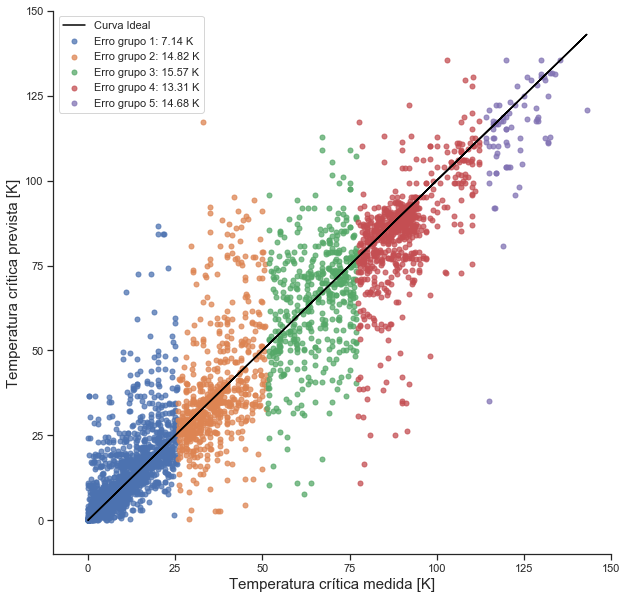

In [15]:
###   Plota a análise em cada faixa de temperatura   ###

fig, ax = plt.subplots(figsize=(10, 10))

sns.despine()

for i in [1,2,3,4,5]:

    legenda = "Erro grupo " + str(i) + ': ' +str(float("{0:.2f}".format(float(erros[i-1])))) + ' K'
    
    ax.scatter(dados_agrupamento.loc[dados_agrupamento['grupo']==i]['Y_teste'], dados_agrupamento.loc[dados_agrupamento['grupo']==i]['Y_previsto'],label=legenda, s=25, alpha=.75)

ax.plot(print_x,print_x, '-', label = 'Curva Ideal',color='black')

plt.xlabel('Temperatura crítica medida [K]',fontsize = 15)
plt.ylabel('Temperatura crítica prevista [K]',fontsize = 15)
plt.legend()
plt.xticks(np.linspace(0, 150, 7, endpoint=True))
plt.yticks(np.linspace(0, 150, 7, endpoint=True))
plt.axis([-10,150,-10,150])


In [16]:
### Testes com supercondutores do DEMAR EEL USP ###

In [ ]:
# 9.5 K no Ti2GeC
# 4.1 K no HfV2Ga4
# 4.0 K no NiTe2
# 3.1 K no Ti2InC
# 7.8 K no Nb2SnC
# 8.7 K no Zr0.96V0.04B2
# 15.3 K no Nb5Ge3
# 7 K no Zr5Pt3C0.3

In [17]:
# 9.5 K no Ti2GeC

tree_reg.predict(tsd.analisar('Ti2GeC'))

array([13.22857143])

In [18]:
# 4.1 K no HfV2Ga4

tree_reg.predict(tsd.analisar('HfV2Ga4'))

array([10.7825])

In [19]:
# 4.0 K no NiTe2

tree_reg.predict(tsd.analisar('NiTe2'))

array([0.70341667])

In [20]:
# 7.8 K no Nb2SnC

tree_reg.predict(tsd.analisar('Nb2SnC'))

array([6.34166667])

In [21]:
# 8.7 K no Zr0.96V0.04B2

tree_reg.predict(tsd.analisar('Zr0.96V0.04B2'))

array([8.16714286])

In [22]:
# 15.3 K no Nb5Ge3

tree_reg.predict(tsd.analisar('Nb5Ge3'))

array([2.342])

In [24]:
# 7 K no Zr5Pt3C0.3

tree_reg.predict(tsd.analisar('Zr5Pt3C0.3'))

array([7.03333333])